The script requires the installation of the HPLCAnalysis library from: https://github.com/POSidorov/HPLCAnalysis.git.

In [1]:
import numpy as np
import pandas as pd
from HPLCAnalysis import *
import glob
pd.set_option('display.max_rows', 500)

In [2]:
path = "chromatogram_data/*.txt"
files = glob.glob(path)
files.sort()

In [8]:
data_name = []
retention_time = []
for file in files:
    data = Chromatogram(file)
    data.calculate_peaks(wl_index=5) # 5 for 220 nm (5*4=20)started from 200
    data1 = data.peaks[max(data.peaks.keys())].center*0.2
    retention_time.append(data1)
    data_name.append(file)
    print("Data Name:", file, ",Retention Time:", data1)

Data Name: chromatogram_data/01-PBT.txt ,Retention Time: 148.0
Data Name: chromatogram_data/02-PBT.txt ,Retention Time: 132.6
Data Name: chromatogram_data/03-PBT.txt ,Retention Time: 76.0
Data Name: chromatogram_data/04-PBT.txt ,Retention Time: 220.20000000000002
Data Name: chromatogram_data/05-PBT.txt ,Retention Time: 132.20000000000002
Data Name: chromatogram_data/06-PBT.txt ,Retention Time: 381.0
Data Name: chromatogram_data/07-PBT.txt ,Retention Time: 504.40000000000003
Data Name: chromatogram_data/08-PBT.txt ,Retention Time: 161.0
Data Name: chromatogram_data/09-PBT.txt ,Retention Time: 97.80000000000001
Data Name: chromatogram_data/10-PBT.txt ,Retention Time: 105.60000000000001
Data Name: chromatogram_data/11-PBT.txt ,Retention Time: 61.800000000000004
Data Name: chromatogram_data/12-PBT.txt ,Retention Time: 133.4
Data Name: chromatogram_data/13-PBT.txt ,Retention Time: 104.80000000000001
Data Name: chromatogram_data/14-PBT.txt ,Retention Time: 238.20000000000002
Data Name: chrom

## Chromatogram visualization

Change the number in the filename to visualize the chromatogram you need

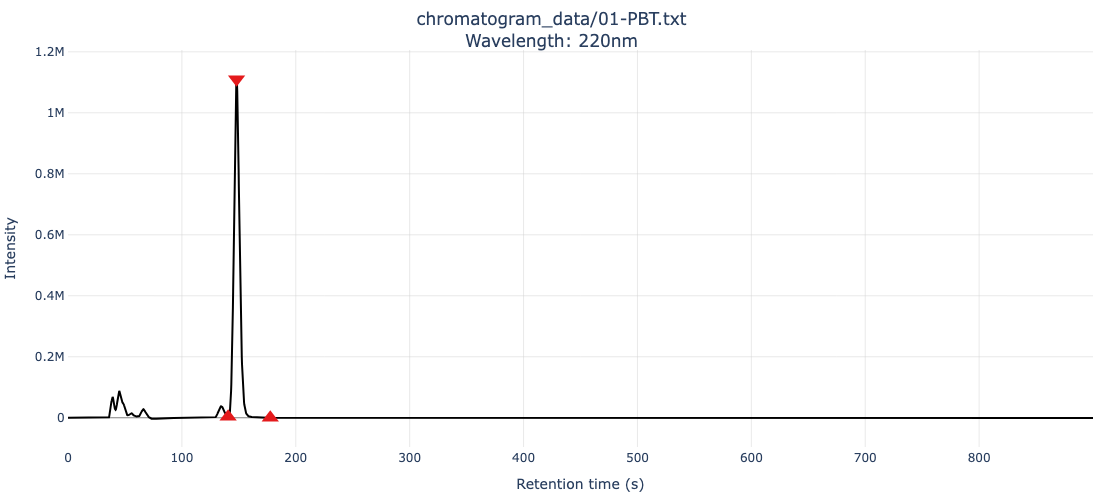

In [21]:
c59 = Chromatogram("chromatogram_data/01-PBT.txt")
c59.calculate_peaks(wl_index=5)
plot(c59, wl_index=5, peaks=True)

## Data file creation

In [4]:
from chython import smiles

In [5]:
amide_smiles = pd.read_excel("../SMILES_data.xlsx")
amide_smiles

,No,InChI,SMILES
0,1a,InChI=1S/C17H18ClNO/c1-11(2)14-5-4-12(3)16(10-...,Cc1c(NC(=O)c2ccc(Cl)cc2)cc(C(C)C)cc1
1,1b,InChI=1S/C13H11ClN2O2/c1-18-12-4-2-3-11(15-12)...,COc1cccc(NC(=O)c2ccc(Cl)cc2)n1
2,1c,InChI=1S/C12H16ClNO/c1-8(2)9(3)14-12(15)10-4-6...,CC(C)C(C)NC(=O)c1ccc(Cl)cc1
3,1d,"InChI=1S/C18H18ClNO3/c1-18(2,3)23-17(22)13-6-1...",CC(C)(C)OC(=O)c1ccc(N=C(O)c2ccc(Cl)cc2)cc1
4,1e,InChI=1S/C16H16ClNO2/c17-15-8-6-14(7-9-15)16(1...,O=C(NCCOCc1ccccc1)c1ccc(Cl)cc1
5,1f,InChI=1S/C18H14ClNO/c19-16-10-8-14(9-11-16)18(...,O=C(NCc1cccc2ccccc12)c1ccc(Cl)cc1
6,1g,InChI=1S/C19H14ClNO2/c20-15-8-6-14(7-9-15)19(2...,OC(=Nc1ccc(Oc2ccccc2)cc1)c1ccc(Cl)cc1
7,1h,InChI=1S/C12H8ClFN2O/c13-9-3-1-8(2-4-9)12(17)1...,O=C(Nc1cnc(F)cc1)c1ccc(Cl)cc1
8,2a,InChI=1S/C18H20FNO/c1-12(2)15-8-7-13(3)17(11-1...,Cc1c(N=C(O)Cc2cc(F)ccc2)cc(C(C)C)cc1
9,2b,InChI=1S/C14H13FN2O2/c1-19-14-7-3-6-12(17-14)1...,COc1cccc(=NC(=O)Cc2cc(F)ccc2)[nH]1


In [6]:
clean_smiles = []
for m in amide_smiles.SMILES:
    smile = smiles(m)
    smile.canonicalize()
    clean_smiles.append(str(smile))
amide_smiles["SMILES"] = clean_smiles
amide_smiles["RT_220"] = retention_time
amide_smiles["k"] = (amide_smiles["RT_220"]-39.8) / 39.8 ## t0 is 39.8 seconds
amide_smiles["lnk"] = np.log(amide_smiles["k"])
amide_smiles

,No,InChI,SMILES,RT_220,k,lnk
0,1a,InChI=1S/C17H18ClNO/c1-11(2)14-5-4-12(3)16(10-...,CC(C)c1ccc(c(NC(c2ccc(cc2)Cl)=O)c1)C,148.0,2.718593,1.000114
1,1b,InChI=1S/C13H11ClN2O2/c1-18-12-4-2-3-11(15-12)...,c1cc(ccc1C(Nc1cccc(n1)OC)=O)Cl,132.6,2.331658,0.846580
2,1c,InChI=1S/C12H16ClNO/c1-8(2)9(3)14-12(15)10-4-6...,c1cc(ccc1C(NC(C(C)C)C)=O)Cl,76.0,0.909548,-0.094808
3,1d,"InChI=1S/C18H18ClNO3/c1-18(2,3)23-17(22)13-6-1...",CC(C)(C)OC(c1ccc(cc1)NC(c1ccc(cc1)Cl)=O)=O,220.2,4.532663,1.511310
4,1e,InChI=1S/C16H16ClNO2/c17-15-8-6-14(7-9-15)16(1...,c1cc(ccc1Cl)C(=O)NCCOCc1ccccc1,132.2,2.321608,0.842260
5,1f,InChI=1S/C18H14ClNO/c19-16-10-8-14(9-11-16)18(...,c1cc(ccc1C(=O)NCc1cccc2ccccc12)Cl,381.0,8.572864,2.148602
6,1g,InChI=1S/C19H14ClNO2/c20-15-8-6-14(7-9-15)19(2...,c1cc(ccc1Cl)C(=O)Nc1ccc(cc1)Oc1ccccc1,504.4,11.673367,2.457310
7,1h,InChI=1S/C12H8ClFN2O/c13-9-3-1-8(2-4-9)12(17)1...,c1cc(ccc1Cl)C(=O)Nc1ccc(F)nc1,161.0,3.045226,1.113575
8,2a,InChI=1S/C18H20FNO/c1-12(2)15-8-7-13(3)17(11-1...,CC(C)c1cc(c(cc1)C)NC(=O)Cc1cccc(F)c1,97.8,1.457286,0.376576
9,2b,InChI=1S/C14H13FN2O2/c1-19-14-7-3-6-12(17-14)1...,N(c1cccc(OC)n1)C(=O)Cc1cc(ccc1)F,105.6,1.653266,0.502753


In [12]:
amide_smiles.to_csv("Amide_retention_full.csv", index=False)

In [7]:
time_data = pd.DataFrame(columns=["1","2","3","4","5","6","7","8"],
                         index= ["a","b","c","d","e","f","g","h"])
for i, row in amide_smiles.iterrows():
    time_data.at[row["No"][1], row["No"][0]] = row["RT_220"]
time_data

,1,2,3,4,5,6,7,8
a,148.0,97.8,130.4,201.6,149.2,81.6,174.8,88.0
b,132.6,105.6,131.8,240.6,150.6,77.0,180.8,86.6
c,76.0,61.8,66.2,103.0,78.8,56.4,88.0,59.6
d,220.2,133.4,179.4,315.6,221.2,102.8,224.4,107.8
e,132.2,104.8,130.4,228.2,149.4,98.0,168.6,110.2
f,381.0,238.2,300.0,654.4,404.8,158.6,488.6,183.8
g,504.4,262.0,371.8,719.8,503.2,179.2,534.0,193.2
h,161.0,107.6,168.8,260.4,185.6,80.6,182.4,87.6
